In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

In [2]:
imdbdf = pd.read_csv("movie_metadata.csv")

In [3]:
nob = pd.DataFrame(imdbdf['movie_title'], imdbdf['duration'], columns = ['Movie','Duration'])

In [4]:
imdbdf.groupby(['duration','movie_title','movie_imdb_link']).size()

duration  movie_title                                     movie_imdb_link                                     
7.0       Shaun the Sheep                                 http://www.imdb.com/title/tt0983983/?ref_=fn_tt_tt_1    1
          The Touch                                       http://www.imdb.com/title/tt1128219/?ref_=fn_tt_tt_1    1
11.0      Robot Chicken                                   http://www.imdb.com/title/tt0437745/?ref_=fn_tt_tt_1    1
14.0      Vessel                                          http://www.imdb.com/title/tt2164708/?ref_=fn_tt_tt_1    1
20.0      Wal-Mart: The High Cost of Low Price            http://www.imdb.com/title/tt0473107/?ref_=fn_tt_tt_1    1
22.0      10,000 B.C.                                     http://www.imdb.com/title/tt1869849/?ref_=fn_tt_tt_1    1
          Anger Management                                http://www.imdb.com/title/tt1986770/?ref_=fn_tt_tt_1    1
          Home Movies                                     http://www.imdb.com

In [5]:
imdbdf['movie_title'].value_counts()

Halloween                               3
Pan                                     3
Home                                    3
Ben-Hur                                 3
Victor Frankenstein                     3
King Kong                               3
The Fast and the Furious                3
The Karate Kid                          2
Poltergeist                             2
The Legend of Tarzan                    2
The Gift                                2
Side Effects                            2
O                                       2
Godzilla Resurgence                     2
Murder by Numbers                       2
Carrie                                  2
Dawn of the Dead                        2
Aloha                                   2
The Possession                          2
Stealing Harvard                        2
The Last House on the Left              2
Hamlet                                  2
The Omen                                2
Unbroken                          

In [8]:
import matplotlib.pyplot as plt

In [9]:
dat = imdbdf

In [12]:
dat.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [18]:
len(set(dat['actor_2_name']))

3033

In [21]:
dat.tail(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [43]:
dat[dat['duration'].isnull()][['movie_title','duration']]

,movie_title,duration
4,Star Wars: Episode VII - The Force Awakens ...,NaN
199,Harry Potter and the Deathly Hallows: Part II,NaN
206,Harry Potter and the Deathly Hallows: Part I,NaN
1510,Black Water Transit,NaN
3604,War & Peace,NaN
3815,Should've Been Romeo,NaN
3834,Barfi,NaN
4299,Hum To Mohabbat Karega,NaN
4392,N-Secure,NaN
4397,Dil Jo Bhi Kahey...,NaN


In [50]:
for i in range(1,4):
    print i, len(dat[(dat['duration']<100) & (dat['duration'] == i)])

1 0
2 0
3 0


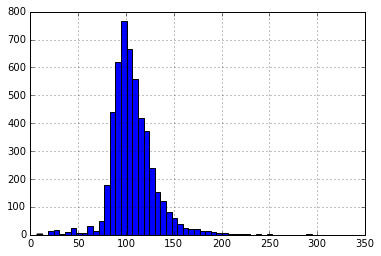

In [57]:
dat[dat['duration']<325]['duration'].dropna().hist(bins=50)

In [70]:
dat['stuff'] = dat['movie_title'].map(lambda x: x[0].upper())
dat[['movie_title','stuff']].head()

,movie_title,stuff
0,Avatar,A
1,Pirates of the Caribbean: At World's End,P
2,Spectre,S
3,The Dark Knight Rises,T
4,Star Wars: Episode VII - The Force Awakens ...,S


In [73]:
type(dat.director_name)

pandas.core.series.Series

In [78]:
dat.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,stuff
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,A
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,P
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,S
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,T
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,S


In [85]:
dat[dat['gross']<500000000]['gross'].mean()

47611094.70960751

In [86]:
dat.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes', u'stuff'],
      dtype='object')

In [89]:
dat.facenumber_in_poster.value_counts()

0.0     2152
1.0     1251
2.0      716
3.0      380
4.0      207
5.0      114
6.0       76
7.0       48
8.0       37
9.0       18
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
31.0       1
14.0       1
19.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64

In [100]:
dat[dat['facenumber_in_poster'] == 43][['movie_title','movie_imdb_link']]

,movie_title,movie_imdb_link
3468,500 Days of Summer,http://www.imdb.com/title/tt1022603/?ref_=fn_t...


In [107]:
dat[dat['facenumber_in_poster'] == 1]['gross'].mean()

44190321.7778837

In [104]:
dat[dat['facenumber_in_poster'] == 2]['gross'].mean()

43985285.0

In [105]:
dat[dat['facenumber_in_poster'] == 3]['gross'].mean()

50990214.034375

In [106]:
dat[dat['facenumber_in_poster'] > 3]['gross'].mean()

46191048.24256293

In [108]:
dat.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes', u'stuff'],
      dtype='object')